Import Data

In [1]:
from ucimlrepo import fetch_ucirepo 
import numpy as np
import matplotlib.pyplot as plt
pi = np.pi
import pandas as pd

from ucimlrepo import fetch_ucirepo 


import seaborn as sns
%matplotlib inline

# Step 1: Pick (and clean) the data

This is some data about how different social factors impact secondary school performance.

In [2]:
# fetch dataset 
student_performance = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
X = student_performance.data.features 
y = student_performance.data.targets 
  
# metadata 
print(student_performance.metadata) 
  
# variable information 
print(student_performance.variables) 

{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'published_in': 'Proceedings of 5th Annual Future Business Technology Conference', 'year'

In [3]:
#X = X.loc[:, X.columns != 'age']
#X = X.loc[:, X.columns != 'school']
X = X.loc[:, X.columns != 'sex']
X = X.loc[:, X.columns != 'address']
#X = X.loc[0:500, :]
X

school  age famsize Pstatus  Medu  Fedu      Mjob      Fjob  reason  \
0       GP   18     GT3       A     4     4   at_home   teacher  course   
1       GP   17     GT3       T     1     1   at_home     other  course   
2       GP   15     LE3       T     1     1   at_home     other   other   
3       GP   15     GT3       T     4     2    health  services    home   
4       GP   16     GT3       T     3     3     other     other    home   
..     ...  ...     ...     ...   ...   ...       ...       ...     ...   
644     MS   19     GT3       T     2     3  services     other  course   
645     MS   18     LE3       T     3     1   teacher  services  course   
646     MS   18     GT3       T     1     1     other     other  course   
647     MS   17     LE3       T     3     1  services  services  course   
648     MS   18     LE3       T     3     2  services     other  course   

    guardian  ...  higher  internet  romantic famrel freetime goout Dalc Walc  \
0     mother  ...     yes        no        no      4        3     4    1    1   
1     father  ...     yes       yes        no      5        3     3    1    1   
2     mother  ...     yes       yes        no      4        3     2    2    3   
3     mother  ...     yes       yes       yes      3        2     2    1    1   
4     father  ...     yes        no        no      4        3     2    1    2   
..       ...  ...     ...       ...       ...    ...      ...   ...  ...  ...   
644   mother  ...     yes       yes        no      5        4     2    1    2   
645   mother  ...     yes       yes        no      4        3     4    1    1   
646   mother  ...     yes        no        no      1        1     1    1    1   
647   mother  ...     yes       yes        no      2        4     5    3    4   
648   mother  ...     yes       yes        no      4        4     1    3    4   

    health absences  
0        3        4  
1        3        2  
2        3        6  
3        5        0  
4        5        0  
..     ...      ...  
644      5        4  
645      1        4  
646      5        6  
647      2        6  
648      5        4  

[649 rows x 28 columns]

In [4]:
y

G1  G2  G3
0     0  11  11
1     9  11  11
2    12  13  12
3    14  14  14
4    11  13  13
..   ..  ..  ..
644  10  11  10
645  15  15  16
646  11  12   9
647  10  10  10
648  10  11  11

[649 rows x 3 columns]

Want to turn these categorical features into numbers.

In [5]:
### Convert objects to categories
obj_columns = X.select_dtypes(['object']).columns

for col in obj_columns:
    X[col] = X[col].astype('category')


### Converty categories to int8s
cat_columns = X.select_dtypes(['category']).columns

#cat_columns = cat_columns.loc[:, cat_columns.columns != 'Medu']
#cat_columns = cat_columns.loc[:, cat_columns.columns != 'Fedu']
#cat_columns = cat_columns.loc[:, cat_columns.columns != 'Mjob']
#cat_columns = cat_columns.loc[:, cat_columns.columns != 'Fjob']

X[cat_columns] = X[cat_columns].apply(lambda x: x.cat.codes + 3)

X['Fjob'] = X['Fjob'].apply(lambda x: x - 3)
X['Mjob'] = X['Mjob'].apply(lambda x: x - 3)
# running this cell makes pandas upset at how I'm doing this, so I've hidden the output

In [6]:
X

school  age  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  reason  guardian  \
0         3   18        3        3     4     4     0     4       3         4   
1         3   17        3        4     1     1     0     2       3         3   
2         3   15        4        4     1     1     0     2       5         4   
3         3   15        3        4     4     2     1     3       4         4   
4         3   16        3        4     3     3     2     2       4         3   
..      ...  ...      ...      ...   ...   ...   ...   ...     ...       ...   
644       4   19        3        4     2     3     3     2       3         4   
645       4   18        4        4     3     1     4     3       3         4   
646       4   18        3        4     1     1     2     2       3         4   
647       4   17        4        4     3     1     3     3       3         4   
648       4   18        4        4     3     2     3     2       3         4   

     ...  higher  internet  romantic  famrel  freetime  goout  Dalc  Walc  \
0    ...       4         3         3       4         3      4     1     1   
1    ...       4         4         3       5         3      3     1     1   
2    ...       4         4         3       4         3      2     2     3   
3    ...       4         4         4       3         2      2     1     1   
4    ...       4         3         3       4         3      2     1     2   
..   ...     ...       ...       ...     ...       ...    ...   ...   ...   
644  ...       4         4         3       5         4      2     1     2   
645  ...       4         4         3       4         3      4     1     1   
646  ...       4         3         3       1         1      1     1     1   
647  ...       4         4         3       2         4      5     3     4   
648  ...       4         4         3       4         4      1     3     4   

     health  absences  
0         3         4  
1         3         2  
2         3         6  
3         5         0  
4         5         0  
..      ...       ...  
644       5         4  
645       1         4  
646       5         6  
647       2         6  
648       5         4  

[649 rows x 28 columns]

In [7]:
X['failures']

0      0
1      0
2      0
3      0
4      0
      ..
644    1
645    0
646    0
647    0
648    0
Name: failures, Length: 649, dtype: int64

In [8]:
X.dtypes

school         int8
age           int64
famsize        int8
Pstatus        int8
Medu          int64
Fedu          int64
Mjob          int64
Fjob          int64
reason         int8
guardian       int8
traveltime    int64
studytime     int64
failures      int64
schoolsup      int8
famsup         int8
paid           int8
activities     int8
nursery        int8
higher         int8
internet       int8
romantic       int8
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
dtype: object

Now convert to numpy arrays so we can do math on the data.

In [9]:
Xnp = X.to_numpy()
print(Xnp)

[[ 3 18  3 ...  1  3  4]
 [ 3 17  3 ...  1  3  2]
 [ 3 15  4 ...  3  3  6]
 ...
 [ 4 18  3 ...  1  5  6]
 [ 4 17  4 ...  4  2  6]
 [ 4 18  4 ...  4  5  4]]


In [10]:
ynp = y.to_numpy()
print(ynp)

[[ 0 11 11]
 [ 9 11 11]
 [12 13 12]
 ...
 [11 12  9]
 [10 10 10]
 [10 11 11]]


Since Pandas are formatted with different labels/features for each column, and a different sample of data in each row, we transpose the matrix to get it in a form we like better.

In [11]:
Xnp = Xnp.T
ynp = ynp.T
print(Xnp.shape)

(28, 649)


# Part 2: Calculate eigenvalues, of C, histogram them, and fit best M-P distribution

Center the data.

In [12]:
Xmean = np.mean(Xnp, axis=1) # the mean of each row/feature across all data points
#changing sape for formatting purposes
Xmean.shape = (Xmean.size, 1)

X_circ = Xnp - Xmean
#print(Xmean.shape)
print("means of features after centering (should all be ~0): ", np.mean(X_circ, axis=1))

means of features after centering (should all be ~0):  [-1.97068864e-16 -1.75172323e-16  1.42327513e-16 -2.07332867e-16
 -1.64224053e-16 -1.53275783e-16  1.09482702e-16  3.28448106e-17
 -4.26982538e-16  6.50053543e-17 -6.56896212e-17  1.31379242e-16
  4.65301483e-17  1.97068864e-16  2.18965404e-16 -8.21120265e-17
  1.23168040e-16  2.01174465e-16 -1.61486985e-16  1.47801648e-16
  2.13491269e-16 -1.57381384e-16  1.72435256e-16  8.75861616e-17
 -1.25905107e-16  2.73706755e-18 -1.86120593e-16  8.75861616e-17]


Calculate Sample Cov Matrix

In [13]:
m, N = X_circ.shape
gamma = m/N

print('number of rows/features, m is:', m)
print('number of cols/data, N is:', N)
print('gamma is:', gamma)
print('1/gamma is:', 1/gamma)

C = X_circ@X_circ.T/N # Sample Covariance Matrix
lamb_minus = (1 - np.sqrt(gamma))**2
lamb_plus = (1 + np.sqrt(gamma))**2

eig_vals, eig_vecs = np.linalg.eigh(C)

#print(eig_vals)
print("The number of eigenvalues is", len(eig_vals))

number of rows/features, m is: 28
number of cols/data, N is: 649
gamma is: 0.04314329738058552
1/gamma is: 23.178571428571427
The number of eigenvalues is 28


In [14]:
print(eig_vals)

[ 0.05212534  0.0737256   0.0833915   0.08590548  0.13515412  0.14664149
  0.17925224  0.205231    0.21573033  0.22099172  0.24219738  0.2481783
  0.29452447  0.36982559  0.41534909  0.50816169  0.61463058  0.66705304
  0.75020637  0.83475878  1.05681138  1.33760518  1.37363684  1.43802825
  2.09325482  2.67956458  2.89748544 21.67515942]


Histogram of the eigenvalues of C

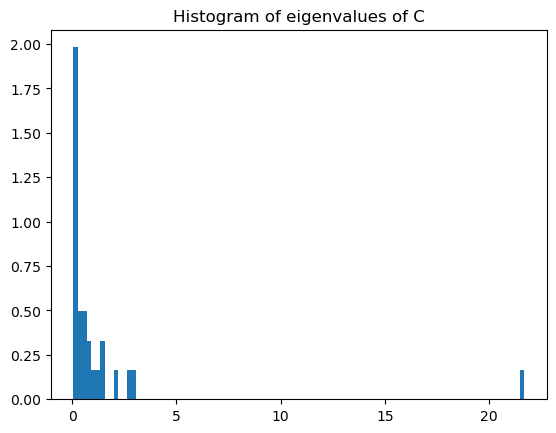

In [15]:
plt.title("Histogram of eigenvalues of C")
plt.hist(eig_vals,density=True,bins=100, label='Empirical eigenvalues');

Histogram of the eigenvalues of C without the big outlier

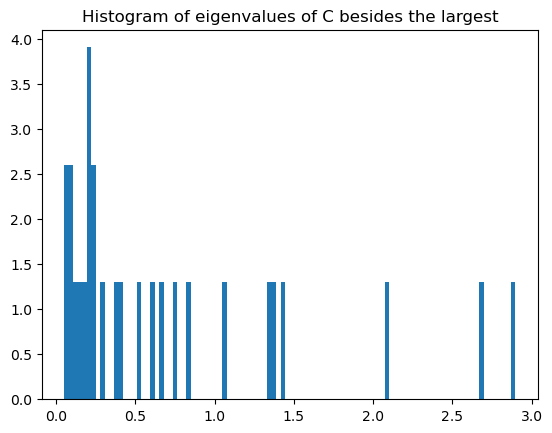

In [16]:
plt.title("Histogram of eigenvalues of C besides the largest")
plt.hist(eig_vals[:-1],density=True,bins=100, label='Empirical eigenvalues');

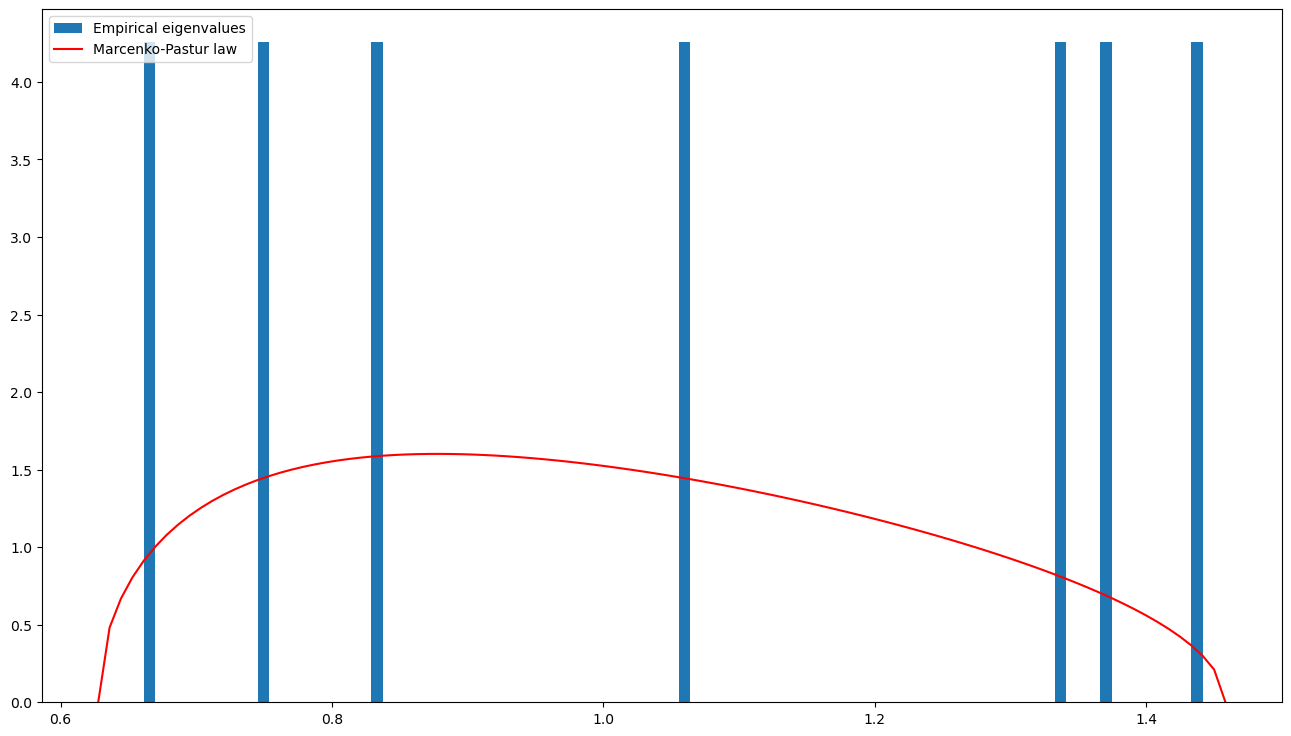

In [17]:
# Limiting measure
edges = np.linspace(lamb_minus,lamb_plus,100);
mu = np.sqrt((edges-lamb_minus)*(lamb_plus-edges))/(2*pi*gamma)

# Empirical histogram
plt.figure(figsize=(16,9))
plt.hist(eig_vals,bins=edges, weights=1/(m*(edges[1]-edges[0])*np.ones(m)), label='Empirical eigenvalues')
plt.plot(edges,mu/edges,'r',label='Marcenko-Pastur law')
_ = plt.legend()

We can conclude that the data doesn't fit the distribution very well.

# Part 3: Determining which eigenvalues are outliers?

Finding outliers

In [18]:
outliers = [e for e in eig_vals if e < lamb_minus or e > lamb_plus]
print(outliers)
print(len(outliers))

[0.05212533530553534, 0.07372559938103831, 0.0833915035774665, 0.08590547852678125, 0.13515412125680212, 0.14664148929331727, 0.17925223589620945, 0.2052310025211701, 0.21573032719896484, 0.22099171795187747, 0.24219738351819867, 0.24817829700173624, 0.2945244749476734, 0.36982558650703484, 0.41534908953812233, 0.5081616935331011, 0.6146305759103002, 2.0932548176179684, 2.679564575626273, 2.897485440451739, 21.675159424386376]
21


# Part 4: PCA

In [19]:
U, S, Vt = np.linalg.svd(X_circ, full_matrices=False)

print(U.shape)
print(S)
print(Vt.shape)

(28, 28)
[118.60513676  43.36436384  41.70176746  36.85813854  30.5496372
  29.85783501  29.46363456  26.18913111  23.27570511  22.06544665
  20.80666781  19.972362    18.1603122   16.41832997  15.49247578
  13.82556994  12.6912456   12.53738816  11.97596029  11.83253913
  11.54101038  10.78585653   9.755528     9.36562997   7.46677009
   7.35670346   6.91721866   5.81629974]
(28, 649)


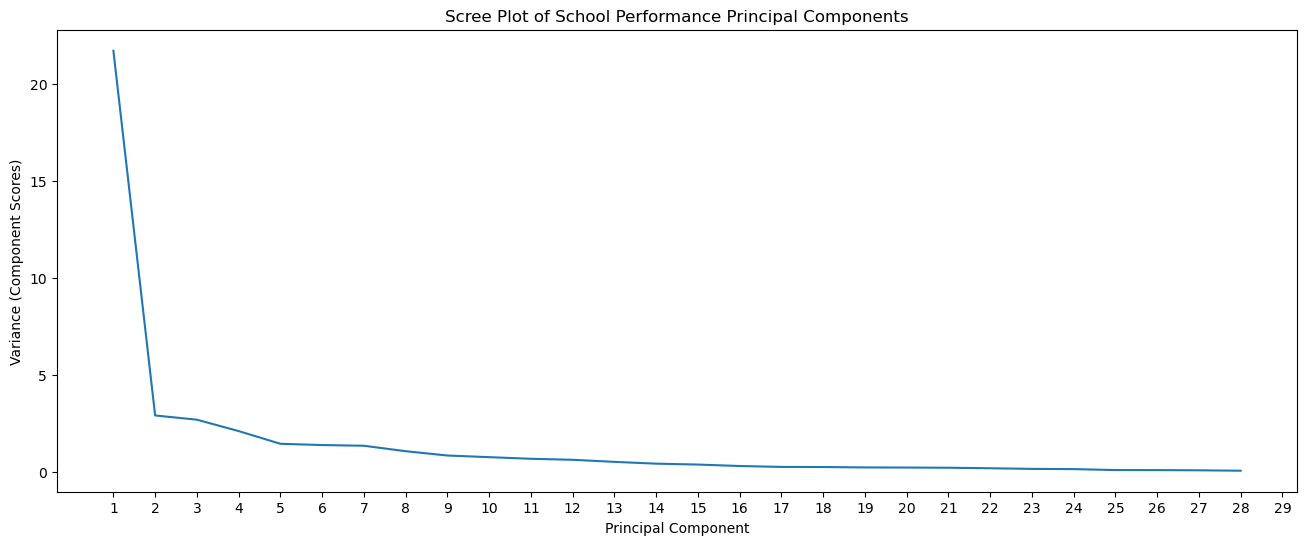

In [20]:
plt.figure(figsize=(16, 6))
plt.xticks([i for i in range(1,31)])
plt.xlabel("Principal Component")
plt.ylabel("Variance (Component Scores)")
plt.title("Scree Plot of School Performance Principal Components")
plt.plot([i for i in range(1,29)], np.square(S)/(N-1));

We can see visually that there are big dropoffs of variance around 2, 5, and 9 PCs

In [21]:
total_variance = np.sum(np.square(S))/(N-1)

print("total_variance = {:.3f} should approximately equal the sum of feature variances: {:.3f}"
      .format(total_variance, np.sum(np.var(Xnp, axis=1))))


two_dim_variance = np.sum(np.square(S[:2]))/(N-1)
three_dim_variance = np.sum(np.square(S[:3]))/(N-1)
five_dim_variance = np.sum(np.square(S[:5]))/(N-1)
nine_dim_variance = np.sum(np.square(S[:9]))/(N-1)

print("The variance of first two components is ", two_dim_variance)
ratio = two_dim_variance / total_variance
print("The ratio two_dim_variance / total_variance = ", ratio)

print("--------------------------------------------------------------")

print("The variance of first three components is ", three_dim_variance)
ratio = three_dim_variance / total_variance
print("The ratio three_dim_variance / total_variance = ", ratio)

print("--------------------------------------------------------------")

print("The variance of first five components is ", five_dim_variance)
ratio = five_dim_variance / total_variance
print("The ratio five_dim_variance / total_variance = ", ratio)

print("--------------------------------------------------------------")

print("The variance of first nine components is ", nine_dim_variance)
ratio = nine_dim_variance / total_variance
print("The ratio nine_dim_variance / total_variance = ", ratio)

total_variance = 40.958 should approximately equal the sum of feature variances: 40.895
The variance of first two components is  24.610565613086322
The ratio two_dim_variance / total_variance =  0.6008777899516198
--------------------------------------------------------------
The variance of first three components is  27.29426531923053
The ratio three_dim_variance / total_variance =  0.666401499307746
--------------------------------------------------------------
The variance of first five components is  30.830997895994187
The ratio five_dim_variance / total_variance =  0.752752381598953
--------------------------------------------------------------
The variance of first nine components is  35.4409131888469
The ratio nine_dim_variance / total_variance =  0.8653054921849448


I'm going to choose to observe the first 5 PCs, since it does good enough and more dimensions would be unruly to plot.

In [22]:
mu = Xmean
Q = U[:,[0, 1, 2, 3, 4]]
print('Q.shape = ', Q.shape)
print('X_circ.shape = ', X_circ.shape)

PCs_centered = Q.T @ X_circ

print('PCs_centered.shape = ', PCs_centered.shape)

PCs_mean = Q.T @ Xmean
print('PCs_mean.shape = ', PCs_mean.shape)

PCs = PCs_mean + PCs_centered
print('PCs.shape = ', PCs.shape)

Q.shape =  (28, 5)
X_circ.shape =  (28, 649)
PCs_centered.shape =  (5, 649)
PCs_mean.shape =  (5, 1)
PCs.shape =  (5, 649)


# Part 5: Project the Data

In [23]:
#y = y.loc[0:500, :]

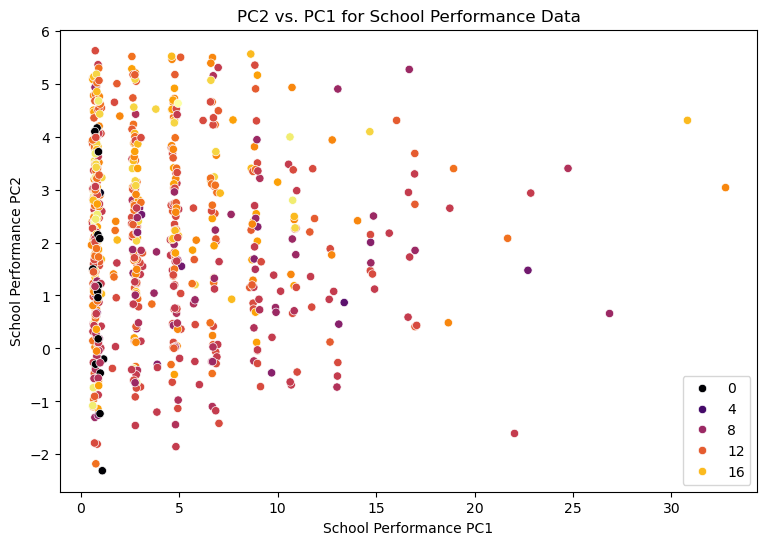

In [24]:
plt.figure(figsize=(9, 6))
plt.title("PC2 vs. PC1 for School Performance Data")
plt.xlabel("School Performance PC1")
plt.ylabel("School Performance PC2")
sns.scatterplot(x = PCs[0, :], y = PCs[1, :], hue= y['G3'].to_numpy(), palette='inferno');

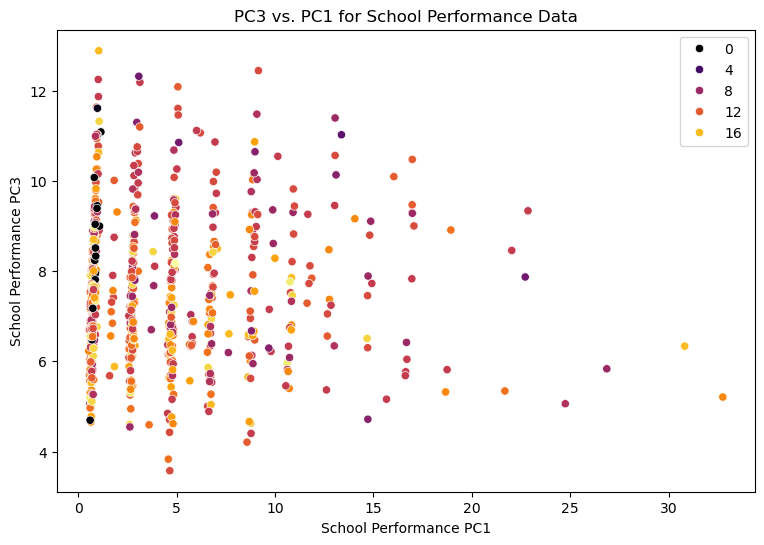

In [25]:
plt.figure(figsize=(9, 6))
plt.title("PC3 vs. PC1 for School Performance Data")
plt.xlabel("School Performance PC1")
plt.ylabel("School Performance PC3")
sns.scatterplot(x = PCs[0, :], y = PCs[2, :], hue= y['G3'].to_numpy(), palette='inferno');

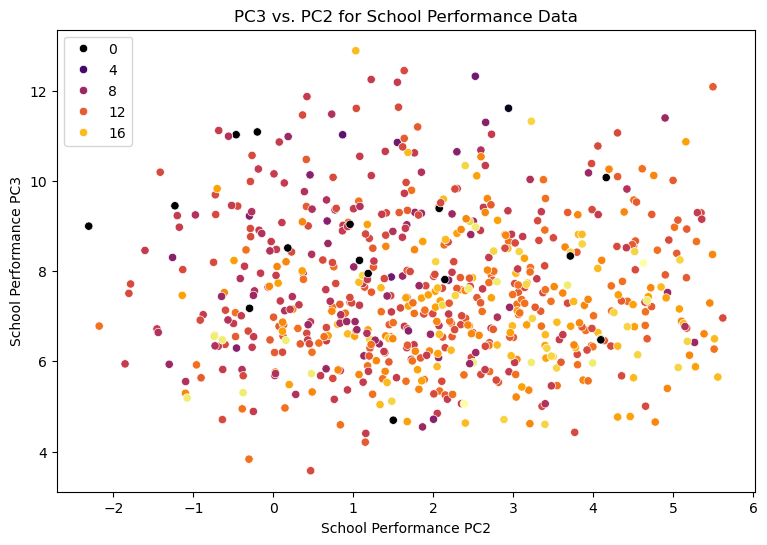

In [26]:
plt.figure(figsize=(9, 6))
plt.title("PC3 vs. PC2 for School Performance Data")
plt.xlabel("School Performance PC2")
plt.ylabel("School Performance PC3")
sns.scatterplot(x = PCs[1, :], y = PCs[2, :], hue= y['G3'].to_numpy(), palette='inferno');

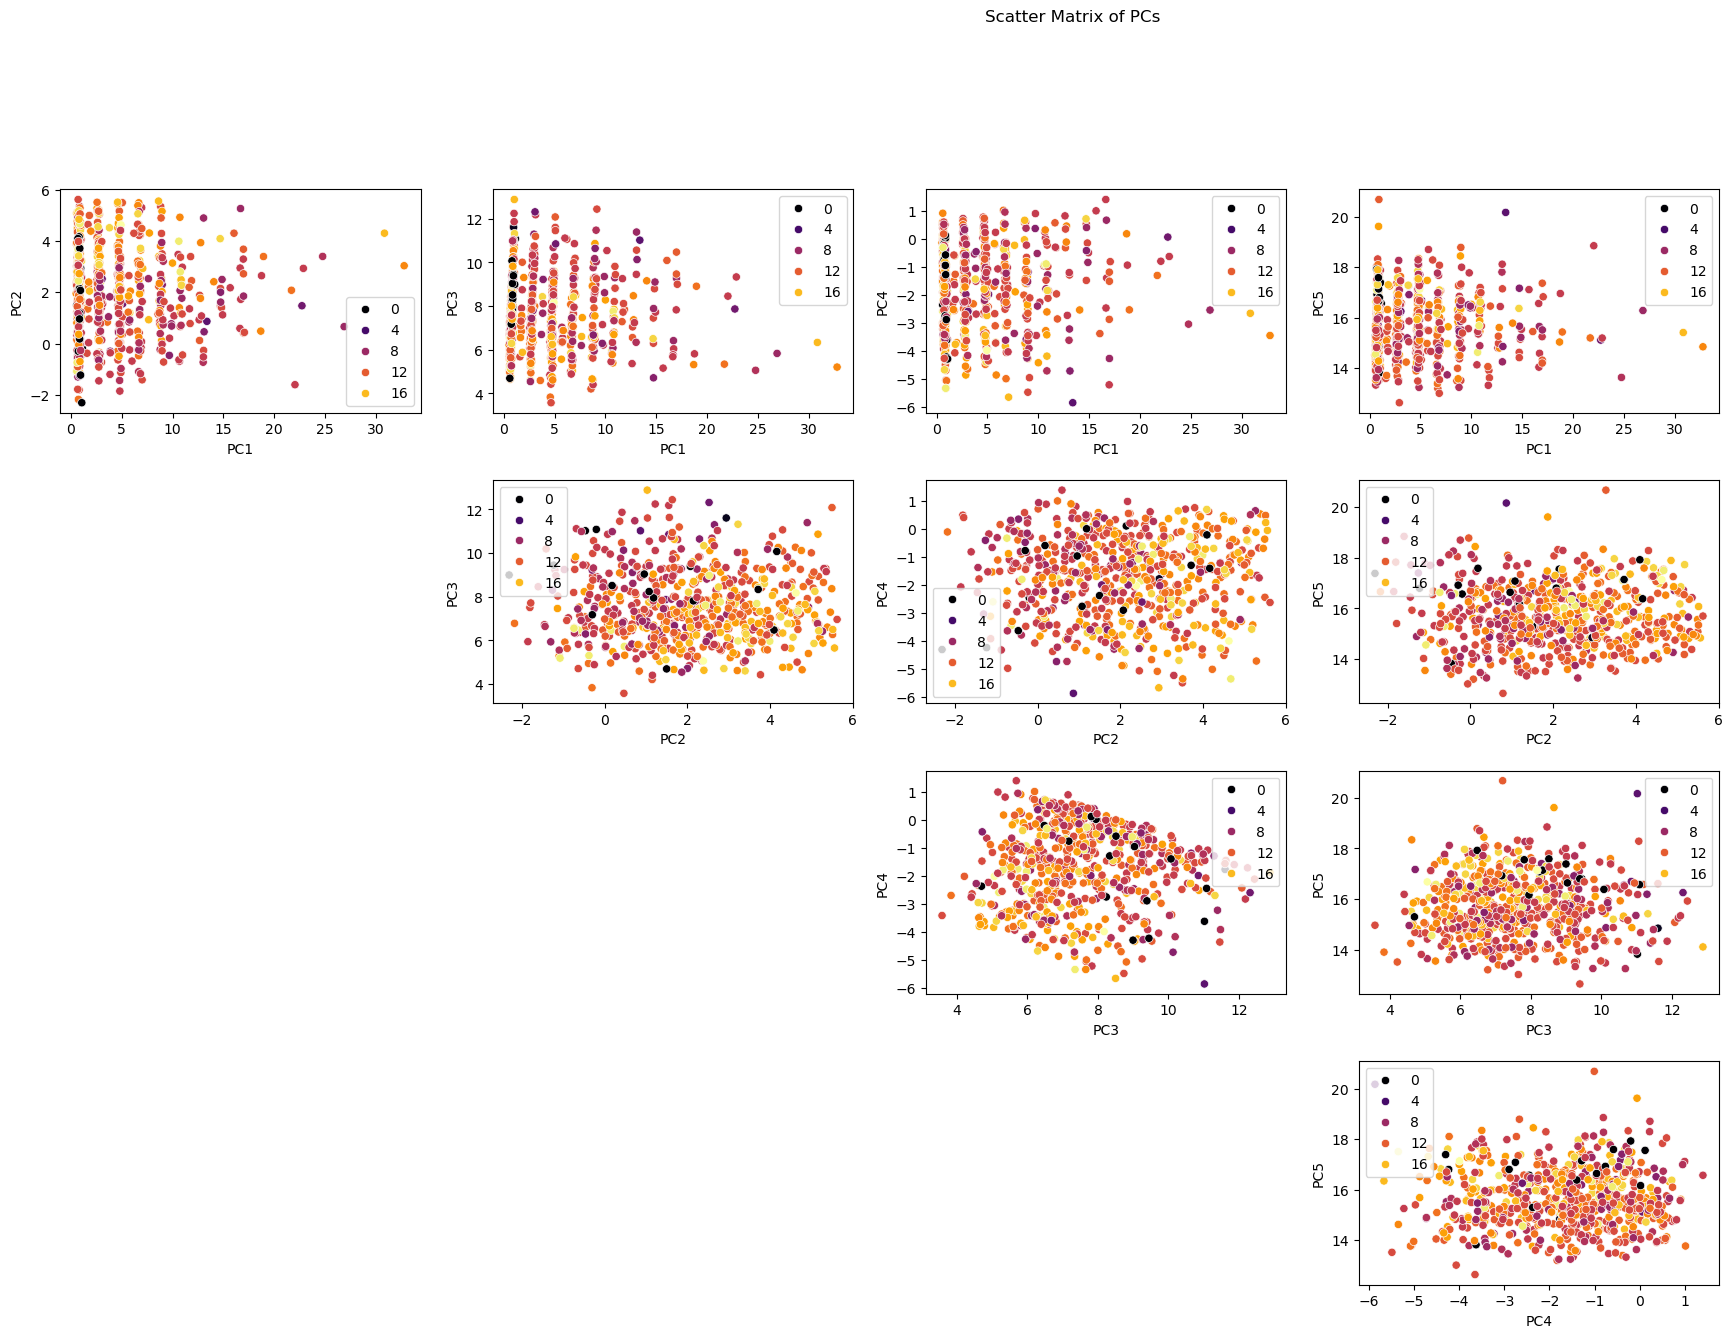

In [27]:
num = 5
plt.figure(figsize=(27, 18))
plt.suptitle("Scatter Matrix of PCs")
plt.subplots_adjust(wspace=0.2, hspace=0.3)
for i in range(0, num):
    for j in range(i):
        plt.subplot(num, num, i+num*j)
        sns.scatterplot(y = PCs[i,: ], x = PCs[j, :], hue= y['G3'].to_numpy(), palette='inferno')
        plt.ylabel("PC" + str(i+1))
        plt.xlabel("PC" + str(j+1))

In [28]:
PCdf = pd.DataFrame(data=PCs.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
guh = pd.concat([PCdf, y], axis=1) 
guh

PC1       PC2       PC3       PC4        PC5  G1  G2  G3
0    4.751479  2.344943  6.811411 -2.068293  16.899450   0  11  11
1    2.669504 -0.603565  6.374036 -1.179453  15.525493   9  11  11
2    6.710798  0.071038  6.775459 -1.830297  13.199925  12  13  12
3    0.592257  3.017047  6.047539  0.131457  14.743498  14  14  14
4    0.679295  3.048221  7.265085 -0.014915  15.212159  11  13  13
..        ...       ...       ...       ...        ...  ..  ..  ..
644  4.773109  2.234941  7.972014  0.216138  18.292586  10  11  10
645  4.784068  2.223394  6.245405 -3.465448  17.540924  15  15  16
646  6.710010  0.027306  5.727219  0.948815  16.989641  11  12   9
647  7.019163  1.638946  9.721664 -4.046907  15.538691  10  10  10
648  4.917457  2.093084  9.513132 -0.321509  16.678168  10  11  11

[649 rows x 8 columns]

In [30]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook"

fig = px.scatter_3d(guh, x='PC1', y='PC2', z='PC3', color='G3')
fig.update_traces(marker_size = 3)
fig.show()